# Aggregate Data Visualisation

In [2]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: JetBrains Mono;
</style>

In [3]:
import os 
import pylab
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [4]:
newspapers = ['times_of_malta','the_shift','malta_today','independent','malta_daily','gozo_news']

news_df = [pd.read_csv(os.path.join('..','data_collection',n,'final_data_tsc.csv'),
                       index_col=False) for n in newspapers]

## Create aggregate dataframe with mean values from all newspapers

In [5]:
columns=['BLIP Caption x NER Title','ITM x NER Title','ITC x NER Title','Title s_Positive','Title s_Neutral','Title s_Negative','BLIP Caption x NER Caption','ITM x NER Caption','ITC x NER Caption','Caption s_Positive','Caption s_Neutral','Caption s_Negative','BLIP Caption x KW Body','ITM x KW Body','ITC x KW Body','Body s_Positive','Body s_Neutral','Body s_Negative',
         'Body s_Positive Prime Minister','Body s_Neutral Prime Minister','Body s_Negative Prime Minister']

#Take average values ignoring zeroes
df =  pd.DataFrame(newspapers,columns=['Newspaper']).join(
         pd.DataFrame([n[columns][n[columns]!=0].mean() for n in news_df], columns=columns))

df['Newspaper'] = ['Times of Malta','The Shift','Malta Today','Malta Independent','Malta Daily','Gozo News']
df.to_csv(os.path.join('..','agg_data.csv'), index=False)

for c in ['BLIP Caption x NER Caption','ITM x NER Caption','ITC x NER Caption','Caption s_Positive','Caption s_Neutral','Caption s_Negative']:
    df[c] = df[c].apply(lambda x: 0 if np.isnan(x) else x)
    
l = len(df)
df.to_csv('aggregate.csv', index=False)
df

,Newspaper,BLIP Caption x NER Title,ITM x NER Title,ITC x NER Title,Title s_Positive,Title s_Neutral,Title s_Negative,BLIP Caption x NER Caption,ITM x NER Caption,ITC x NER Caption,...,Caption s_Negative,BLIP Caption x KW Body,ITM x KW Body,ITC x KW Body,Body s_Positive,Body s_Neutral,Body s_Negative,Body s_Positive Prime Minister,Body s_Neutral Prime Minister,Body s_Negative Prime Minister
0,Times of Malta,0.133847,0.244395,0.315209,0.120518,0.606242,0.273238,0.221660,0.379080,0.341698,...,0.099948,0.124142,0.306082,0.331730,0.198299,0.557410,0.244288,0.125098,0.565413,0.309491
1,The Shift,0.085112,0.183089,0.297242,0.127252,0.543446,0.329300,0.115271,0.183435,0.233883,...,0.078163,0.077708,0.256757,0.322611,0.146271,0.493069,0.360659,0.109777,0.569362,0.320861
2,Malta Today,0.103799,0.233545,0.312110,0.162559,0.620452,0.216989,0.131032,0.192787,0.267091,...,0.057958,0.089080,0.298218,0.324932,0.270509,0.518960,0.210525,0.177672,0.526259,0.296062
3,Malta Independent,0.113049,0.276551,0.321435,0.169222,0.654199,0.176581,0.000000,0.000000,0.000000,...,0.000000,0.106095,0.321760,0.336818,0.256123,0.597025,0.146853,0.187379,0.580050,0.232572
4,Malta Daily,0.159354,0.474705,0.347631,0.221527,0.656778,0.121698,0.000000,0.000000,0.000000,...,0.000000,0.109857,0.541049,0.348699,0.354715,0.517606,0.127680,0.314518,0.484345,0.201145
5,Gozo News,0.140074,0.360761,0.323736,0.177369,0.763338,0.059293,0.000000,0.000000,0.000000,...,0.000000,0.131428,0.414466,0.348407,0.326068,0.625843,0.048089,0.266504,0.605837,0.127683


In [ ]:
def get_palette(values, neutral=False, switch=False):
    
    if neutral:
#         p_palette = np.array(sns.diverging_palette(58,68,s=100000,n=l*2,center='light'))[:l]
        p_palette = sns.color_palette('flare',n_colors=l*2)[:l]
        n_palette = sns.color_palette('flare',n_colors=l*2)[l:]
    else:
        p_palette = np.array(sns.diverging_palette(120, 140,s=1000,n=l*2,center='light'))[:l]
        n_palette = np.array(sns.diverging_palette(0, 20,s=1000,n=l*2,center='light'))[:l]
        
    palette   = np.array([[0.]*3]*l)
    
    #Let higher values be red instead of green
    if switch:
        p_palette,n_palette = n_palette,p_palette
    
    
    v   = np.sort(values.iloc[0]) #List of values
    idx = np.argsort(values.iloc[0].tolist()) #Indices of sorted v
    
    #Determine index where elements of v cross 0
    k=0
    while v[k]<=0: 
        k+=1 
    
    #Trim short palette list and reverse
    p_palette = p_palette[::-1][k:]
    
        
    p,n = 0,0
    
    #Assign brightest possible red/green color for corresponding -ve/+ve values
    for i,j in enumerate(idx):
        if i < k:
            palette[j] = n_palette[n]
            n+=1
        else:
            palette[j] = p_palette[p]
            p+=1

    return sns.color_palette(palette)
def draw_maxdiff(key:str,xlabel:str,title:str,switch:bool=False,neutral:bool=False,caption:bool=False):

    sns.set(rc={'figure.figsize':(28,18)})
    sns.set(font="JetBrains Mono")
    plt.clf()

    val = df[['Newspaper',key]]
        
    #Drop non-caption newspapers
    if caption: val = val[val[key] != 0]
    
    original = val[key].tolist()
    
    #Calculate average
    mean = val[key].mean()

    #Get maxdiff values
    val[key] = val[key].apply(lambda x: x-mean)
    val = val.set_index('Newspaper').T

    #Plot Barplot

    palette = np.array(sns.diverging_palette(0, 120,s=1000,n=len(val.columns),center='light'))[val.iloc[0].rank().sub(1).astype(int).array]
    palette = get_palette(val,neutral,switch)
    
    ax = sns.barplot(data=val,orient='h',estimator=lambda x: (x[0]/mean)*100,
                     palette=palette, units='%')
    
    #Percentage offset between gridlines
    p = 20 
    q = p/100
    
    ax.set_xticks(range(-100,100+p,p))
    ax.set_xticklabels([str(i)+'%' for i in range(-100,100+p,p)])
    ax.tick_params(labelsize=24)
    ax.set_xlabel(f'\n\n{xlabel}', fontsize=40)
    ax.set_ylabel(f'Newspaper', fontsize=40)
    ax.yaxis.set_label_coords(-0.2,0.5)
    ax.axvline(0)
    
    #Add another axis
    ax2 = ax.twiny()
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("axes", -0.05))
    ax2.tick_params(axis='x', colors='grey')
    ax2.tick_params(labelsize=20)
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)
    ax2.grid(False)
    
    num_ticks = 11 #Number of ticks on second x-axis
    #Cant find a way to calculate the offset (0.099..) from num_ticks. 1/num_ticks does compresses axis
    ax2.set_xticks(np.arange(0,1,0.0999999999)) 
    t = 0.5/(num_ticks//2)
    ax2.set_xticklabels([round(mean-i*mean,4) for i in np.arange(1,0,-q)] +
                        [f'{round(mean,4)}\n(Mean)'] +
                        [round(mean+i*mean,4) for i in np.arange(q,1+q,q)])
    
    #Display Labels
    ax.bar_label(ax.containers[0], fmt='    %.2f  ', fontsize=28)
    ax.set_title(f'{title}\n',fontsize=40)
    
    #Save figure
    pylab.savefig(os.path.join('figures','maxdiff',f'{key} maxdiff.jpg'), bbox_inches='tight', pad_inches=1, dpi=300)
def draw_barchart(key:str,xlabel:str,title:str,switch:bool=False,neutral:bool=False,caption:bool=False):
    
    sns.set(rc={'figure.figsize':(28,18)})
    sns.set(font="JetBrains Mono")
    plt.clf()
    
    val = df[['Newspaper',key]]
    
    #Drop non-caption newspapers
    if caption: val = val[val[key] != 0]
    
    original = val[key].tolist()
    
    #Calculate average
    mean = val[key].mean()
    norm_val = val.copy()
    norm_val[key] = norm_val[key].apply(lambda x: x-mean)

    norm_val = norm_val.set_index('Newspaper').T
    val = val.set_index('Newspaper').T

    #Plot Barplot
    palette = np.array(sns.diverging_palette(0, 120,s=1000,n=len(val.columns),center='light'))[val.iloc[0].rank().sub(1).astype(int).array]
    palette = get_palette(norm_val,neutral,switch)

    
    ax = sns.barplot(data=val,orient='v',
                     estimator=lambda x: x[0]*100,
                     palette=palette)

    ax.tick_params(labelsize=28)
    ax.set_ylabel(f'\n{xlabel}', fontsize=40)
    ax.set_xlabel(f'Newspaper', fontsize=40)

    #Display Labels
    ax.bar_label(ax.containers[0], fmt='    %.2f  ', fontsize=28)
    ax.set_title(f'{title}\n',fontsize=40)
    ax.axhline(y=mean*100, linestyle='--') 
    ax.set_yticks(np.arange(0,110,10))
    
    #Save figure
    pylab.savefig(os.path.join('figures','barchart',f'{key} barchart.jpg'), bbox_inches=None, pad_inches=0, dpi=300)
    
    '' 

In [ ]:
bar_data = [('BLIP Caption x NER Title',
             'Similarity Score (%)',
             'Similarity of synthetic newspaper captions to headlines'),
            ('ITM x NER Title',
             'Similarity Score (%)',
             'Similarity of newspaper images to headlines'),
            ('ITC x NER Title',
             'Cosine Similarity Score (%)',
             'Cosine Similarity of newspaper images to headlines'),
            ('Title s_Positive',
             'Positive Sentiment Score (%)',
             'How positive are newspaper headlines to named entities'),
            ('Title s_Neutral',
             'Neutral Sentiment Score (%)',
             'How neutral are newspaper headlines to named entities'),         
            ('Title s_Negative',
             'Negative Sentiment Score (%)',
             'How negative are newspaper headlines to named entities'),
            ('BLIP Caption x NER Caption',
             'Similarity Score (%)',
             'Similarity of synthetic newspaper captions to actual captions'),
            ('ITM x NER Caption',
             'Similarity Score (%)',
             'Similarity of newspaper images to their captions'),
            ('ITC x NER Caption',
             'Cosine Similarity Score (%)',
             'Cosine Similarity of newspaper images to their captions'),
            ('Caption s_Positive',
             'Positive Sentiment Score (%)',
             'How positive are newspaper captions to named entities'),
            ('Caption s_Neutral',
             'Neutral Sentiment Score (%)',
             'How neutral are newspaper captions to named entities'),
            ('Caption s_Negative',
             'Negative Sentiment Score (%)',
             'How negative are newspaper captions to named entities'),
            ('BLIP Caption x KW Body',
             'Similarity Score (%)',
             'Similarity of synthetic newspaper captions to condensed newspaper articles'),
            ('ITM x KW Body',
             'Similarity Score (%)',
             'Similarity of newspaper images to condensed newspaper articles'),
            ('ITC x KW Body',
             'Cosine Similarity Score (%)',
             'Cosine Similarity of newspaper images to headlines'),
            ('Body s_Positive',
             'Positive Sentiment Score (%)',
             'How positive are the first and last sentences \nof newspaper articles to named entities'),
            ('Body s_Neutral',
             'Neutral Sentiment Score (%)',
             'How neutral are the first and last sentences \nof newspaper articles to named entities'),
            ('Body s_Negative',
             'Negative Sentiment Score (%)',
             'How negative are the first and last sentences \nof newspaper articles to named entities'),
            ('Body s_Neutral Prime Minister',
             'Neutral Sentiment Score (%)',
             'What is the average neutral sentiment towards the phrase \n "Prime Minister" in newspaper articles'),
            ('Body s_Positive Prime Minister',
             'Positive Sentiment Score (%)',
             'What is the average positive sentiment towards the phrase \n "Prime Minister" in newspaper articles'),
            ('Body s_Negative Prime Minister',
             'Negative Sentiment Score (%)',
             'What is the average negative sentiment towards the phrase \n "Prime Minister" in newspaper articles')]

hist_data = ['BLIP Caption x NER Title','ITM x NER Title','Title s_Positive','Title s_Neutral','Title s_Negative','BLIP Caption x NER Caption','ITM x NER Caption','Caption s_Positive','Caption s_Neutral','Caption s_Negative','BLIP Caption x KW Body','ITM x KW Body','Body s_Positive','Body s_Neutral','Body s_Negative','Body s_Neutral Prime Minister','Body s_Positive Prime Minister','Body s_Negative Prime Minister']

## Maxdiff graph

In [ ]:
sns.set(rc={'figure.figsize':(28,18)})
sns.set(font="JetBrains Mono")

In [ ]:
for key,xlabel,title in bar_data:
    
    draw_maxdiff(key,xlabel,title,
                 caption='Caption'  in key,
                 switch ='Negative' in key,
                 neutral='Neutral'  in key)

## Barchart

In [ ]:
for key,xlabel,title in bar_data:
    draw_barchart(key,xlabel,title,
                 caption='Caption'  in key,
                 switch ='Negative' in key,
                 neutral='Neutral'  in key)

## Single Feature Sub Plots

In [ ]:
def draw_dist(key:str, xlabel:str,title:str):
    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font="JetBrains Mono")
    plt.clf()

#     key = 'ITM x KW Body'

    names = [['Times of Malta','The Shift'],
             ['Malta Today','Malta Independent'],
             ['Malta Daily','Gozo News']]

    fig,ax = plt.subplots(3, 2, sharey=True)
    fig.suptitle(title, fontsize=30)

    for (i,j),df in zip([(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)],news_df):

        df = df[df[key] > 0.05]
        df = df[df[key] < 0.95]

        ax[i][j] = sns.histplot(df[key],bins=15, kde=True,ax=ax[i][j])
        ax[i][j].tick_params(labelsize=18)
    #     ax[i][j].set_xticks(np.arange(0,1,0.1))
        ax[i][j].set_xlabel(f'{names[i][j]}\n{xlabel}', fontsize=20)
        ax[i][j].set_ylabel(f'Count', fontsize=20)
        
        #Save figure
        pylab.savefig(os.path.join('figures','dist',f'{key} single_subplots.jpg'),
                      bbox_inches=None, pad_inches=0, dpi=300)
    
    return

for key in hist_data:
    draw_dist(key,'','')


### Overlay multiple subplots into one

In [ ]:
def draw_dist_overlay(key:str, xlabel:str,title:str):
    
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font="JetBrains Mono")
    plt.clf()

    names = [['Times of Malta','The Shift'],
             ['Malta Today','Malta Independent'],
             ['Malta Daily','Gozo News']]
        
    for df in news_df:
        ax = sns.kdeplot(x=df[key])
        ax.tick_params(labelsize=18)
        ax.set_xlabel(f'\n{xlabel}', fontsize=20)
        ax.set_ylabel(f'Density', fontsize=20)
        ax.legend(np.array(names).flatten(),fontsize='x-large', title_fontsize='40')
        ax.set(xlim=(0,1))
        ax.yaxis.set_label_coords(-0.075,0.5)
        ax.set_title(f'\n{title}',fontsize=20)
        ax.set_xticks(np.arange(-0.1,1.1,0.1))
        
    pylab.savefig(os.path.join('figures','dist_overlay',f'{key} overlay_subplots.jpg'),
                      bbox_inches=None, pad_inches=0, dpi=300)
    
for key in hist_data:
    draw_dist_overlay(key,'','')

## 2 Feature correlations

In [ ]:
def draw_histlike(xkey:str,ykey:str,xlabel:str,ylabel:str,title:str):
    
    names = [['Times of Malta','The Shift'],
             ['Malta Today','Malta Independent'],
             ['Malta Daily','Gozo News']]
    
    for i,df in enumerate(news_df):    
        sns.set(rc={'figure.figsize':(28,18)})
        sns.set(font="JetBrains Mono")
        plt.clf()
        
        name = np.array(names).flatten()[i]
        
        try:
            df = df[df[xkey] != 0]
            df['group'] = pd.cut(df[key], 8)
        except: continue

        ax = sns.barplot(x=df['group'],y=df[ykey])
        ax.tick_params(labelsize=20)
        ax.yaxis.set_label_coords(-0.075,0.5)
        ax.set_xlabel(f'\n{xkey}', fontsize=40)
        ax.set_ylabel(f'{ylabel}', fontsize=40)
        ax.set_title(f'{name}', fontsize=40)
        
        pylab.savefig(os.path.join('figures','histlike',name,f'{xkey}-{ykey} histlike.jpg'),
                      bbox_inches=None, pad_inches=0, dpi=300)
    
    
for key,xlabel,title in bar_data:
    draw_histlike(xkey=key,ykey='ITM x KW Body',
                  xlabel=xlabel, ylabel='ITM x KW Body',
                  title=title)
    
    draw_histlike(xkey=key,ykey='BLIP Caption x KW Body',
                  xlabel=xlabel, ylabel='BLIP Caption x KW Body',
                  title=title)

In [ ]:
def draw_scatter(xkey:str,ykey:str,xlabel:str,ylabel:str,title:str):
    
    sns.set(rc={'figure.figsize':(15,7)})
    sns.set(font="JetBrains Mono")
    
    
    names = [['Times of Malta','The Shift'],
             ['Malta Today','Malta Independent'],
             ['Malta Daily','Gozo News']]
    
    for i,df in enumerate(news_df):    
        df = df[df[xkey] != 0]
        
        c = round(df[xkey].corr(df[ykey]),2)
        name = np.array(names).flatten()[i]

        
        
        ax = sns.regplot(x=df[xkey],y=df[ykey])
        ax.tick_params(labelsize=12)
        ax.yaxis.set_label_coords(-0.075,0.5)
        ax.set_xlabel(f'{xkey}', fontsize=20)
        ax.set_ylabel(f'{ylabel}', fontsize=20)
        ax.set_title(f'\n{name} - corr={c}',fontsize=20)
        
        pylab.savefig(os.path.join('figures','scatter',name,f'{xkey}-{ykey} scatter.jpg'),
                      bbox_inches=None, pad_inches=0, dpi=300)
        plt.clf()
        
for key,xlabel,title in bar_data:
    draw_scatter(xkey=key,ykey='ITM x NER Title',
                  xlabel=xlabel, ylabel='ITM x NER Title',
                  title=title)
    
    draw_scatter(xkey=key,ykey='BLIP Caption x NER Title',
                  xlabel=xlabel, ylabel='BLIP Caption x NER Title',
                  title=title)

## Stacked Bar Chart

In [9]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set(font="JetBrains Mono")

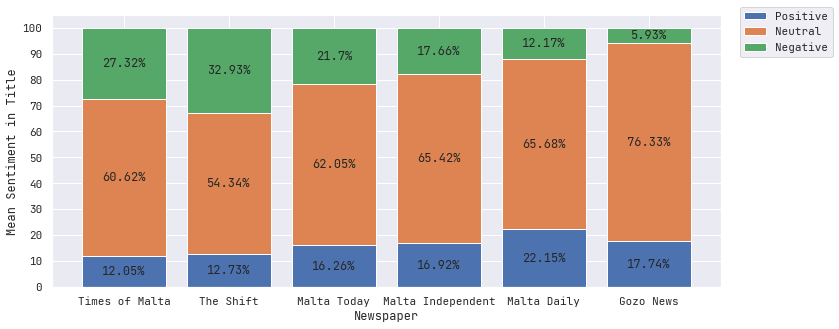

<Figure size 864x360 with 0 Axes>

In [13]:
newspapers = ['Times of Malta','The Shift','Malta Today',
              'Malta Independent','Malta Daily','Gozo News'
             ]

key = 'Title'

neg = np.array(df[f'{key} s_Negative'])
net = np.array(df[f'{key} s_Neutral'])
pos = np.array(df[f'{key} s_Positive'])

neg = neg[neg!=0]
net = net[net!=0]
pos = pos[pos!=0]


actions = {'Positive': pos, 'Neutral': net, 'Negative': neg}

fig, ax = plt.subplots()
bottom = np.zeros(len(newspapers))

for a, action in actions.items():
    p = ax.bar(newspapers, action, label=a, bottom=bottom)
    bottom += action
    ac = [str(round(x*100,2))+'%' if x != 0 else '' for x in action]
    ax.bar_label(p, labels=ac, label_type='center')

ax.set_xlabel('Newspaper')
ax.set_ylabel(f'Mean Sentiment in {key}')
ax.set_xticks(range(len(newspapers)),newspapers,rotation='horizontal')
ax.set_yticks(np.arange(0,1.1,0.1),range(0,110,10))
ax.legend(['Positive','Neutral','Negative'],
            bbox_to_anchor=(1.02,1.05))


pylab.savefig(os.path.join('figures',f'{key} Sentiment Stacked.jpg'),
                      bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()
plt.clf()

## Summary Table Building

In [37]:
df['SCS'] = df.apply(lambda x: np.mean([i for i in [x['BLIP Caption x NER Title'],
                                                    x['BLIP Caption x NER Caption'],
                                                    x['BLIP Caption x KW Body']] if i]), axis=1)

df['ITM'] = df.apply(lambda x: np.mean([i for i in [x['ITM x NER Title'],
                                                    x['ITM x NER Caption'],
                                                    x['ITM x KW Body']] if i]), axis=1)

df['pos'] = df.apply(lambda x: np.mean([i for i in [x['Title s_Positive'],
                                                    x['Caption s_Positive'],
                                                    x['Body s_Positive']] if i]), axis=1)

df['net'] = df.apply(lambda x: np.mean([i for i in [x['Title s_Neutral'],
                                                    x['Caption s_Neutral'],
                                                    x['Body s_Neutral']] if i]), axis=1)
df['neg'] = df.apply(lambda x: np.mean([i for i in [x['Title s_Negative'],
                                                    x['Caption s_Negative'],
                                                    x['Body s_Negative']] if i]), axis=1)



df[['SCS','ITM','pos','net','neg']] = df[['SCS','ITM','pos','net','neg']].apply(lambda x: x.apply(lambda y: round(y*100,2)))
df[['Newspaper','SCS','ITM','pos','net','neg']]

,Newspaper,SCS,ITM,pos,net,neg
0,Times of Malta,15.99,30.99,13.87,65.55,20.58
1,The Shift,9.27,20.78,11.71,62.68,25.60
2,Malta Today,10.80,24.15,16.79,67.03,16.18
3,Malta Independent,10.96,29.92,21.27,62.56,16.17
4,Malta Daily,13.46,50.79,28.81,58.72,12.47
5,Gozo News,13.58,38.76,25.17,69.46,5.37
